In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_X_test, wine_y_test)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_X_test[:, 0], wine_X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [ ]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [ ]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [ ]:
wine = load_wine()

In [ ]:
# Наименования признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# Разделение выборки на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=1)
wine_X_train.shape, wine_X_test.shape, wine_y_train.shape, wine_y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [ ]:
# Обучим классификатор на 5 деревьях
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(wine_X_train, wine_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [ ]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([137, 103, 138,  26, 138,  50, 126,  67,  34,  24,  43,  58, 112,
        118, 104,  46, 104,  27,  74,  37,  45, 132,  44,  69,  74,  23,
        108,  64,   0,  50,  78,  42, 112,  77,  50,   4, 114,  14,  56,
        105,  43,  39,  43, 139,  80, 127, 116,  56,  54, 110, 138, 136,
          4,  79,  62,  44,  60, 111,  74, 114, 125, 137, 102,  88,  14,
        130, 107, 110, 118,  41,  62,  66,  37,  14,  52, 120, 117,  68,
         73,  39, 104,  92,  44, 139,  22,  66, 107,  27,  85,  54,  40,
         95,  38,  92,  97,  61, 116,  73, 116,  68,  48,  20, 124,  82,
         37,  58, 101,   7, 123, 141,  38, 116, 105,  91,   7,   0, 131,
          3,  22,  59, 133,  20, 106, 123,  11, 121,  66,  18,  46,  52,
         62,  89,  86,  37, 115, 132,  38,  90,  84,  86,  25,  48]),
 array([ 95,  46,  93, 129,  44, 136,  87,  61,  68,  87, 102,  31,  34,
         17,  58,  38,  79,  88,  70,  22,  88, 112, 115,  52,  19,  15,
         49,  39,  41, 130,  14,  47, 127,  18,  13, 1

In [ ]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, wine_X_train.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,

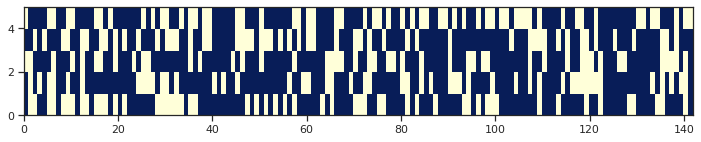

In [ ]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [ ]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 37.32%
Для модели № 2 размер OOB составляет 34.510000000000005%
Для модели № 3 размер OOB составляет 33.1%
Для модели № 4 размер OOB составляет 37.32%
Для модели № 5 размер OOB составляет 41.55%


In [ ]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.7394366197183099, 0.2605633802816901)

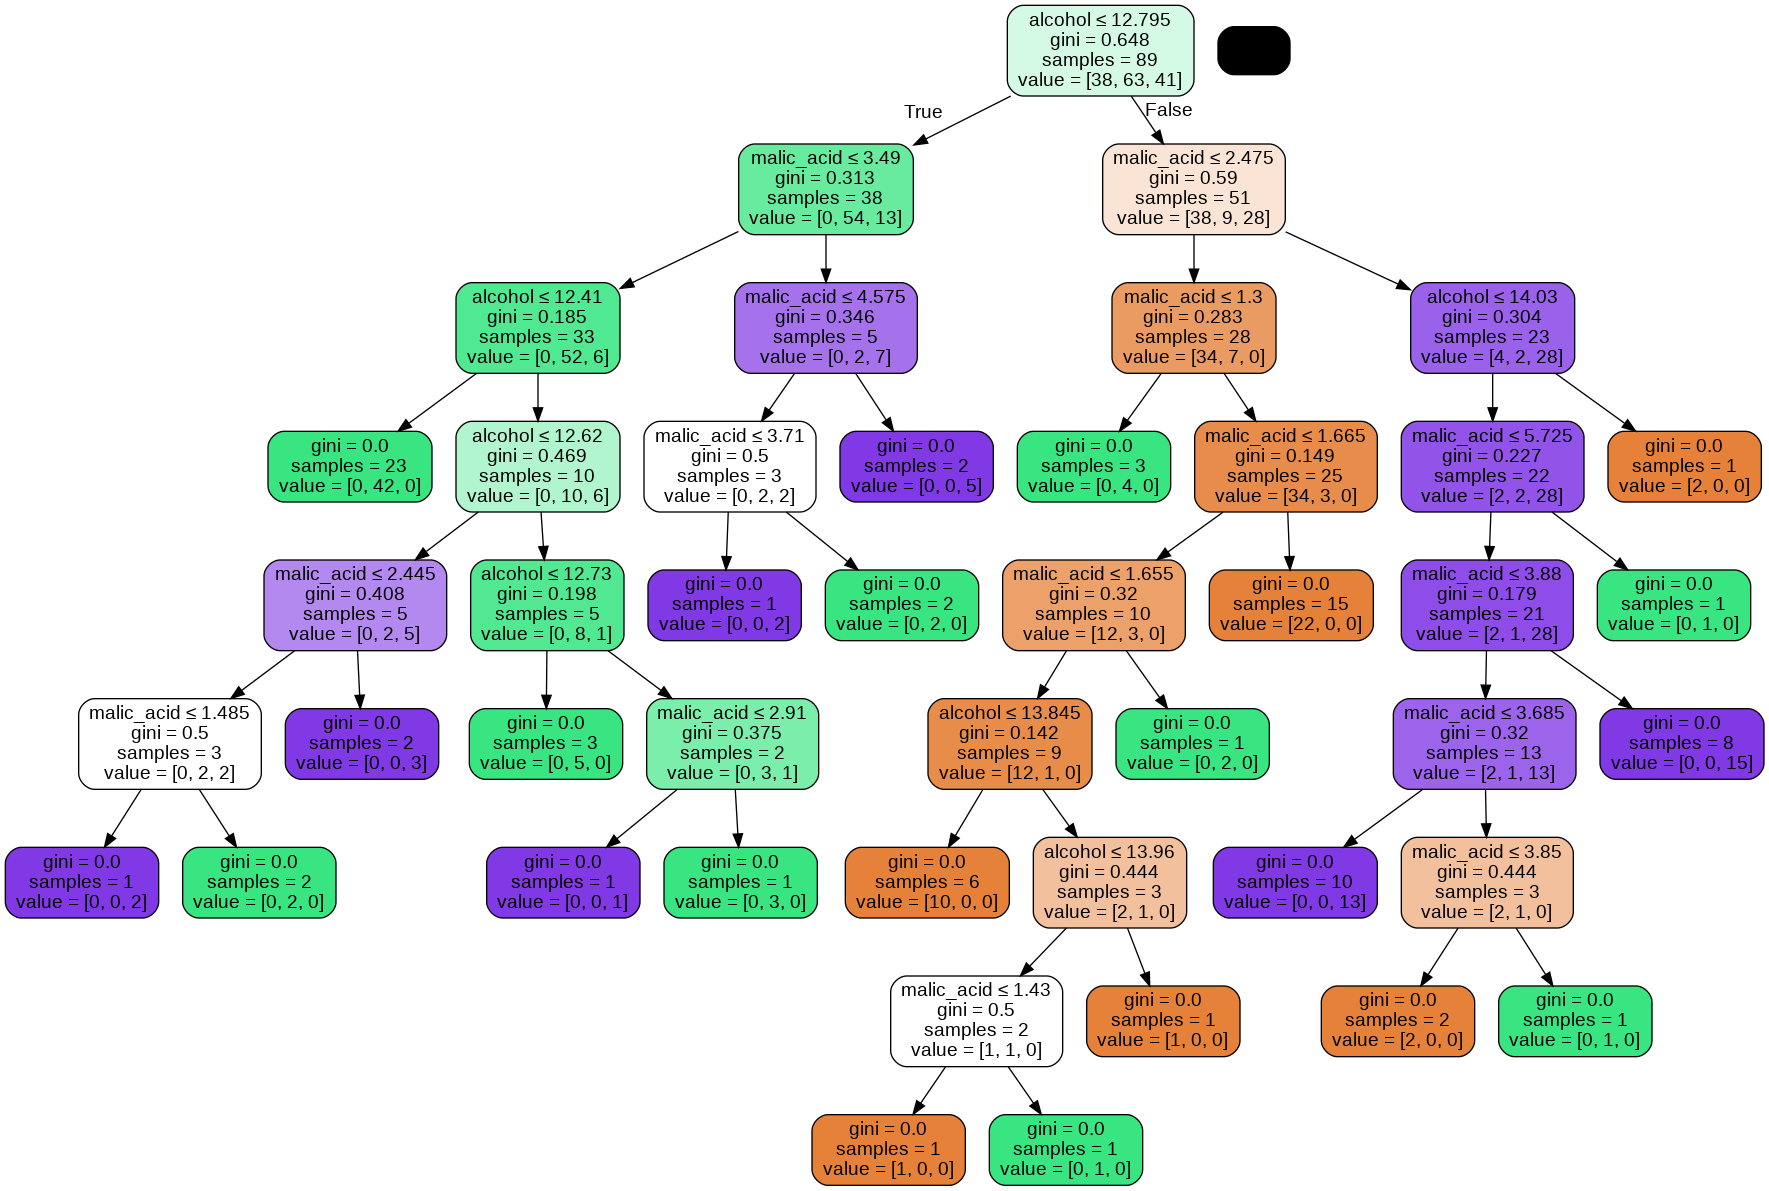

In [ ]:
# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[0], wine.feature_names[:2]), width='80%')

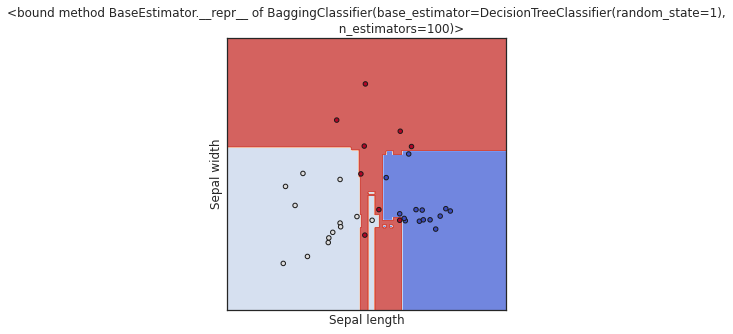

In [ ]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))

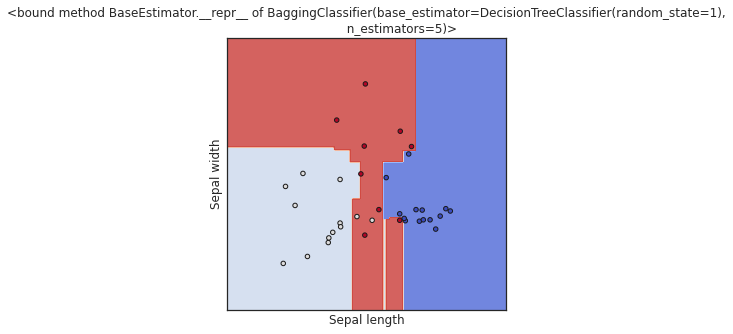

In [ ]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=5))

In [ ]:
# Оценка качества модели
accuracy_score(wine_y_test, bc1.predict(wine_X_test))

0.9444444444444444

In [ ]:
# Разделение выборки на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data[:, :2], wine.target, test_size=0.2, random_state=1)
wine_X_train.shape, wine_X_test.shape, wine_y_train.shape, wine_y_test.shape

((142, 2), (36, 2), (142,), (36,))

In [ ]:
# Обучение модели бустинга (градиентный спуск)
gb = GradientBoostingClassifier(n_estimators=15, random_state=1)
gb.fit(wine_X_train, wine_y_train)

GradientBoostingClassifier(n_estimators=15, random_state=1)

In [ ]:
# Оценка качества модели
accuracy_score(wine_y_test, gb.predict(wine_X_test))

0.8055555555555556

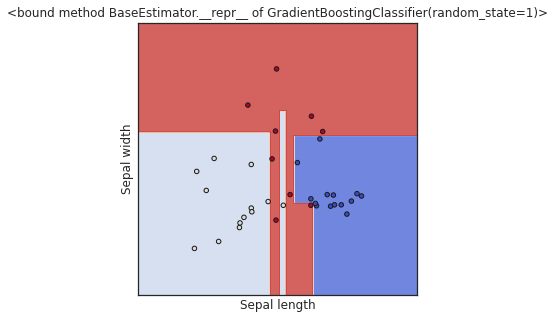

In [ ]:
plot_cl(GradientBoostingClassifier(random_state=1))

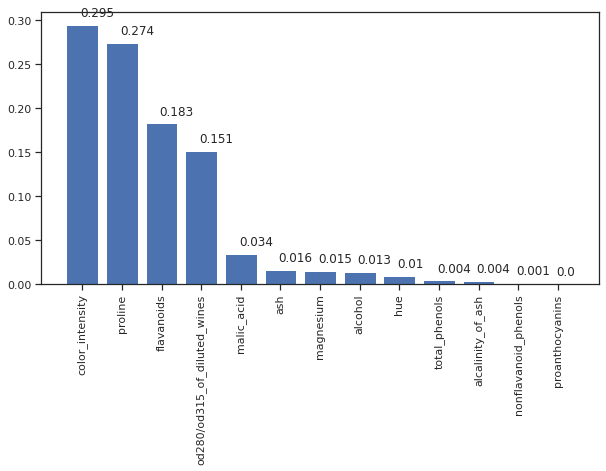

In [ ]:
# Важность признаков
wine_gb_cl = GradientBoostingClassifier(random_state=1)
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_gb_cl.fit(wine_x_ds, wine.target)
_,_ = draw_feature_importances(wine_gb_cl, wine_x_ds)

In [ ]:
pip install heamy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15366 sha256=6a7657b543d0fdfb64bd87486d1da7583d18c52515282fda0f1f995a7aede620
  Stored in directory: /root/.cache/pip/wheels/f5/6c/da/55718ad26a9c8d3528b50edc2676fb33b0fb2e2b04e54cc882
Successfully built heamy


In [ ]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

dataset = Dataset(wine_X_train, wine_y_train, wine_X_test, wine_y_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.3431662527344008, 0.527911030698969, 0.3838755538000987, 0.5206191328497749, 0.3693554694369639, 0.4163363893649233, 0.49533607407839936, 0.5406465146457741, 0.3427835707154732, 0.5806617964837661]
Mean accuracy: 0.45206917848085426
Standard Deviation: 0.08560202366948302
Variance: 0.007327706456310731


In [ ]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

dataset = Dataset (wine_X_train, wine_y_train, wine_X_test, wine_y_test)

model_tree = Regressor(dataset=dataset, estimator=DecisionTreeClassifier, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LogisticRegression,name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestClassifier, parameters={'n_estimators': 50},name='rf')

pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeClassifier)
results = stacker.validate(k=10,scorer=accuracy_score)

Metric: accuracy_score
Folds accuracy: [0.8, 0.7333333333333333, 0.9285714285714286, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.6428571428571429, 0.8571428571428571, 1.0, 0.7142857142857143]
Mean accuracy: 0.8176190476190476
Standard Deviation: 0.0999557725325808
Variance: 0.009991156462585034
